In [ ]:
!pip install split_folders

In [ ]:
import tensorflow as tf
# Panggil Library untuk split
import splitfolders
import os

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"andhikapande","key":"ec46cd79844c764a8b916ee38863c1a5"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pip install kaggle
import kaggle
!kaggle datasets download -d shiv28/animal-5-mammal --unzip shiv28/animal-5-mammal

#!kaggle datasets download -d andrea2727/dataset-of-aquatic-animals --unzip andrea2727/dataset-of-aquatic-animals

 99% 879M/892M [00:08<00:00, 150MB/s]
100% 892M/892M [00:08<00:00, 108MB/s]


In [ ]:
dir = '/content/Animal/train'

In [ ]:
splitfolders.ratio(dir, output = '/content/Baru', ratio = (.8, .2))

Copying files: 13497 files [00:03, 3427.77 files/s]


In [ ]:
animals = os.path.join(dir)
print(os.listdir(animals))

['ELEPHANT', 'LION', 'HORSE', 'cat', 'dog']


In [ ]:
from PIL import Image

list_animals = os.listdir(animals)
total = 0
jumlah = []
for x in list_animals:
  dir = os.path.join(animals, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  jumlah.append(y)
  total = total + y

  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)


ELEPHANT: 2740
- (64, 64)
- (64, 64)
- (255, 198)
- (275, 183)
---------------
LION: 2684
- (64, 64)
- (64, 64)
- (64, 64)
- (64, 64)
---------------
HORSE: 2709
- (64, 64)
- (64, 64)
- (378, 278)
- (64, 64)
---------------
cat: 2737
- (512, 512)
- (512, 512)
- (512, 512)
- (512, 512)
---------------
dog: 2627
- (512, 512)
- (512, 512)
- (512, 512)
- (512, 512)
---------------

Total : 13497


In [ ]:
# Resolusi/dimensi Width (w), high (h)
w = 150
h = 150

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

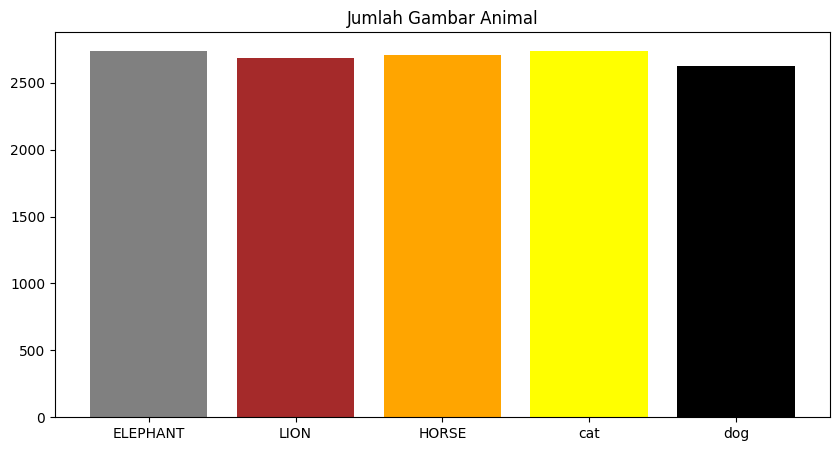

In [ ]:
x = list_animals

plt.figure(figsize = (10,5))
plt.bar(x, jumlah, color=['gray', 'brown', 'orange', 'yellow', 'black'])
plt.title("Jumlah Gambar Animal")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

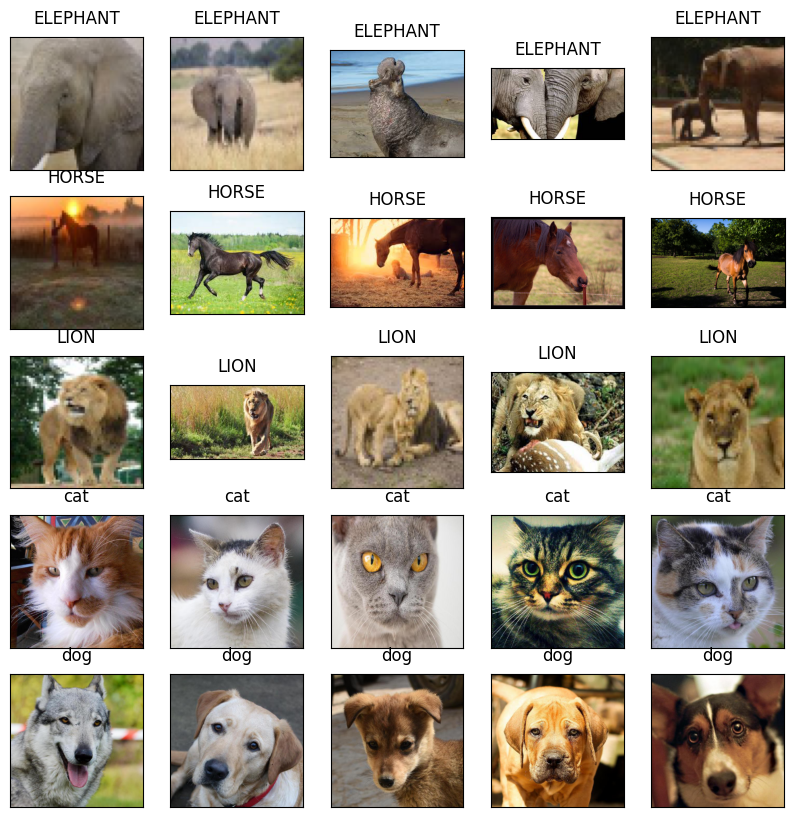

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(10,10))
animals_sorted = sorted(list_animals)
animals_id = 0
for i in range(5):
  for j in range(5):
    try:
      animals_selected = animals_sorted[animals_id]
    except:
      break
    if animals_selected == '.TEMP':
        continue
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))
    animals_selected_random = np.random.choice(animals_selected_images)
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animals_selected, pad=10, fontsize=12)
  animals_id += 1

plt.setp(ax, xticks=[],yticks=[])
plt.show

In [ ]:
class_names = ['ELEPHANT', 'LION', 'HORSE', 'cat', 'dog']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator (
    rescale = 1./255,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.15,
)


In [ ]:
train_dataset = datagen.flow_from_directory(
    '/content/Baru/train',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)

validation_dataset = datagen.flow_from_directory(
    '/content/Baru/val',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)


Found 10796 images belonging to 5 classes.
Found 2700 images belonging to 5 classes.


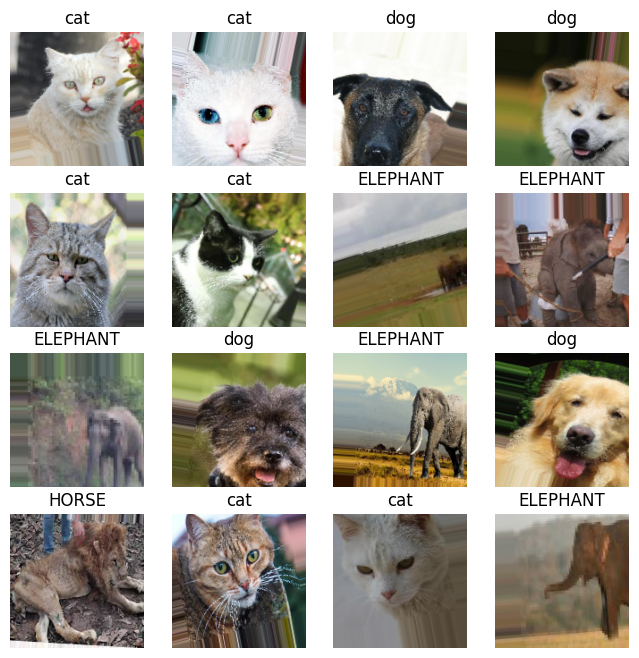

In [ ]:
plt.figure(figsize=(8, 8))

images, labels = train_dataset.next()

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_dataset[0][0][i])
  plt.title(class_names[tf.argmax(labels[i])])
  plt.axis('off')

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential(
    [
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(w, h, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
    ]
)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [ ]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = None):
    if (logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print('Akurasi telah mencapai 95%!')
      self.model.stop_training = True

In [ ]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    validation_steps = 5,
    epochs = 100,
    callbacks = [callback()]
)

Epoch 1/100
43/43 [==============================] - 141s 3s/step - loss: 1.5652 - accuracy: 0.2778 - val_loss: 1.4897 - val_accuracy: 0.3586
Epoch 2/100
43/43 [==============================] - 128s 3s/step - loss: 1.4251 - accuracy: 0.3859 - val_loss: 1.3946 - val_accuracy: 0.4383
Epoch 3/100
43/43 [==============================] - 129s 3s/step - loss: 1.2881 - accuracy: 0.4709 - val_loss: 1.1895 - val_accuracy: 0.5102
Epoch 4/100
43/43 [==============================] - 128s 3s/step - loss: 1.1517 - accuracy: 0.5367 - val_loss: 1.1423 - val_accuracy: 0.5484
Epoch 5/100
43/43 [==============================] - 129s 3s/step - loss: 1.0264 - accuracy: 0.5936 - val_loss: 0.9516 - val_accuracy: 0.6180
Epoch 6/100
43/43 [==============================] - 122s 3s/step - loss: 0.9451 - accuracy: 0.6239 - val_loss: 0.8375 - val_accuracy: 0.6648
Epoch 7/100
43/43 [==============================] - 128s 3s/step - loss: 0.7966 - accuracy: 0.6827 - val_loss: 0.7500 - val_accuracy: 0.7016
Epoch 

In [ ]:
model.save('gfgModel.h5')
print('Model Saved!')

NameError: ignored

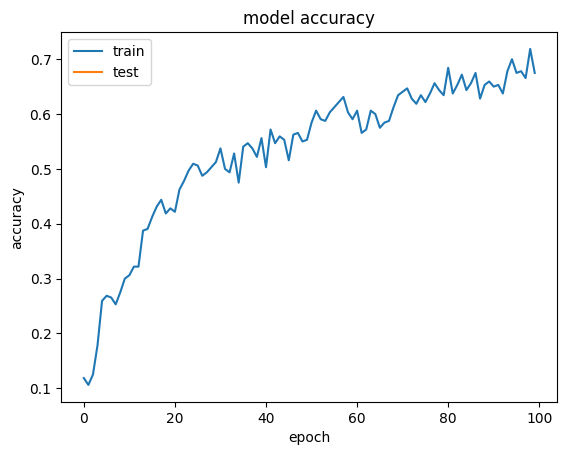

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

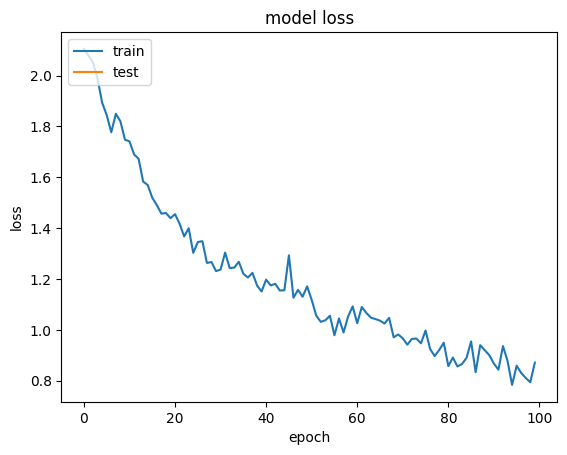

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model.evaluate(validation_dataset)

1/1 [==============================] - 1s 1s/step - loss: 1.3093 - accuracy: 0.5250


[1.3093328475952148, 0.5249999761581421]

In [ ]:
from keras.models import load_model
model = load_model('gfgModel.h5')
print('Model Load!')

Model Load!


1/1 [==============================] - 0s 18ms/step
seahorse


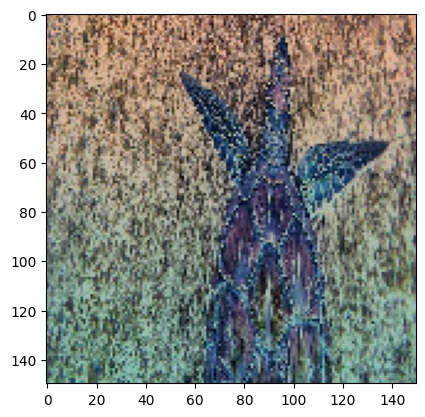

In [ ]:
import numpy as py
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

dir = '/content/Coba gambar/seaturtle.jpeg'

img = image.load_img(dir, target_size = (w, h))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = py.expand_dims(x, axis = 0)

predictions = model.predict(x)
score = tf.nn.softmax(predictions[0])

print("{}" .format(class_names[py.argmax(score)]))